In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("fuel-econ.csv")
print(df.shape)
df.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Quantitative vs Quantitative Variables

#### Displacement vs Combined Fuel Efficiency

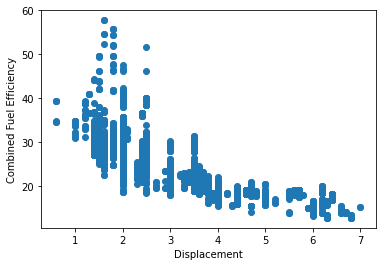

In [3]:
plt.scatter(data=df, x='displ', y='comb')
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency');

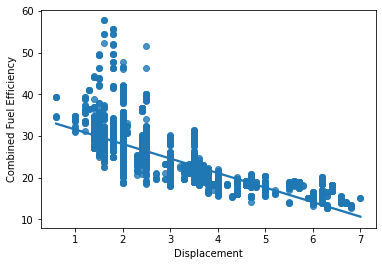

In [4]:
sb.regplot(data=df, x='displ', y='comb', fit_reg=True)
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency');

Avec la variable `comb` à une échelle logarithmique

In [5]:
def log_transform(x, inverse=False):
    if not inverse:
        return np.log10(x)
    return np.power(10, x)

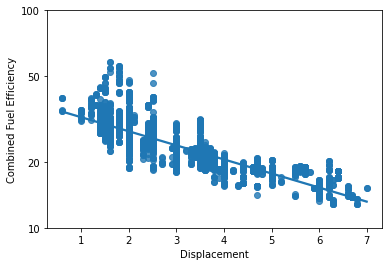

In [6]:
labels = [10, 20, 50, 100]
sb.regplot(data=df, x='displ', y=df['comb'].apply(log_transform))
plt.xlabel('Displacement')
plt.ylabel('Combined Fuel Efficiency')
plt.yticks(log_transform(labels), labels);

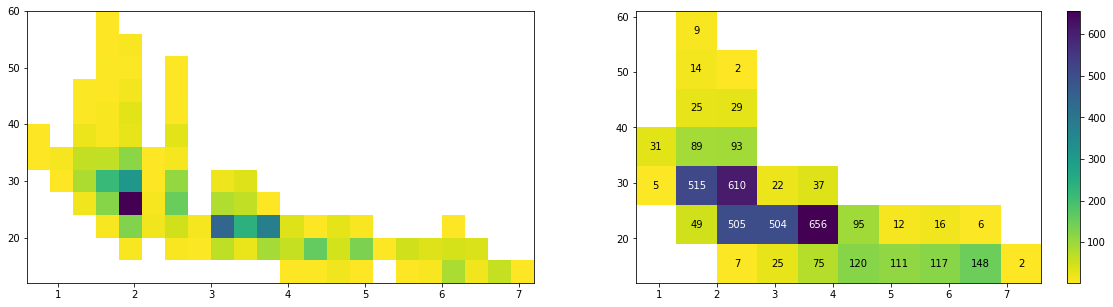

In [7]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
x_bins = np.arange(0.6, 7+0.3, 0.3)
y_bins = np.arange(12, 57+4, 4)
plt.hist2d(data=df, x='displ', y='comb', bins=[x_bins, y_bins], cmin=0.5, cmap='viridis_r');

plt.subplot(1, 2, 2)
x_bins = np.arange(0.6, 7+0.7, 0.7)
y_bins = np.arange(12, 57+7, 7)
hist = plt.hist2d(data=df, x='displ', y='comb', bins=[x_bins, y_bins], cmin=0.5, cmap='viridis_r');
plt.colorbar()

counts = hist[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i][j]
        if str(c) == 'nan':
            continue
        plt.text(x_bins[i]+0.35, y_bins[j]+3.5, int(c), va='center', ha='center', color='white' if c>=200 else 'black')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

#### Fuel efficiency vs Manufacturing year

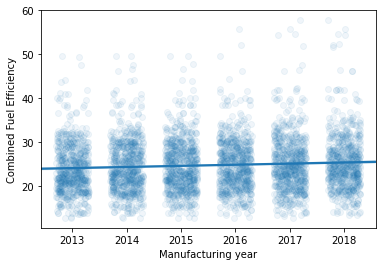

In [9]:
sb.regplot(data=df, x='year', y='comb', x_jitter=0.3, scatter_kws={'alpha': 1/15}, truncate=False)
plt.ylabel('Combined Fuel Efficiency')
plt.xlabel('Manufacturing year');

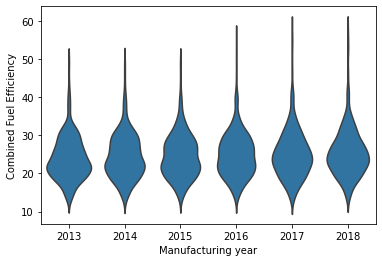

In [10]:
color_base = sb.color_palette()[0]
sb.violinplot(data=df, x='year', y='comb', color=color_base, inner=None, orient='v')
plt.ylabel('Combined Fuel Efficiency')
plt.xlabel('Manufacturing year');

## Quantitative vs Qualitative Variables

#### VClass vs comb

In [11]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
df.VClass = df.VClass.astype(vclasses)

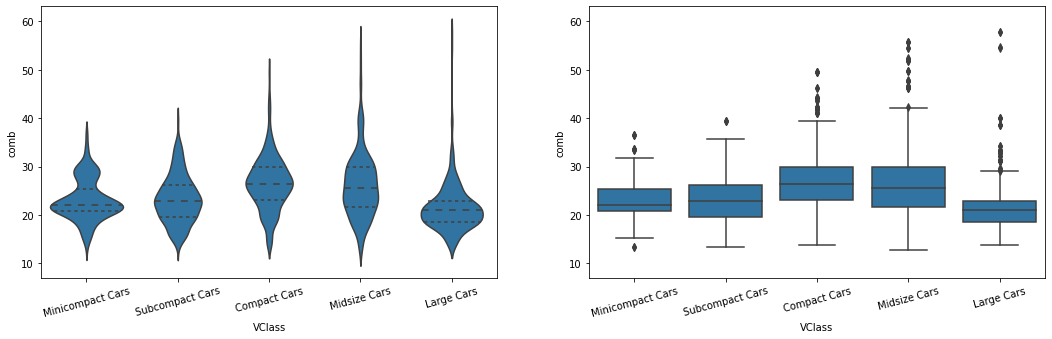

In [12]:
plt.figure(figsize=[18, 5])
plt.subplot(1, 2, 1)
first = sb.violinplot(data=df, x='VClass', y='comb', color=color_base, inner="quartile") # inner in {"quartile", None, not set}
plt.xticks(rotation=15);

plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='VClass', y='comb', color=color_base)
plt.ylim(first.get_ylim())
plt.xticks(rotation=15);

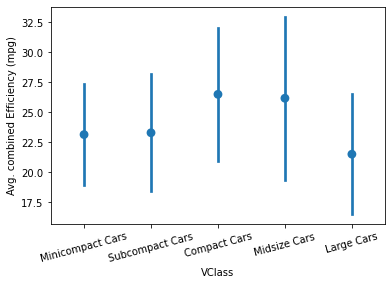

In [32]:
sb.pointplot(data=df, x='VClass', y='comb', ci='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel("Avg. combined Efficiency (mpg)");

In [29]:
df.groupby('VClass').mean()[['comb']]

,comb
VClass,
Minicompact Cars,23.152877
Subcompact Cars,23.303826
Compact Cars,26.504232
Midsize Cars,26.180177
Large Cars,21.519717


In [27]:
df.groupby('VClass').std()[['comb']]

,comb
VClass,
Minicompact Cars,4.240233
Subcompact Cars,4.871526
Compact Cars,5.558006
Midsize Cars,6.807304
Large Cars,5.000261


## Qualitative vs Qualitative Variables

In [13]:
df['trans'] = df['trans'].apply(lambda x: x.split()[0])

In [14]:
counts = df.groupby(['VClass', 'trans']).size()
counts

VClass            trans    
Minicompact Cars  Automatic    188
                  Manual       133
Subcompact Cars   Automatic    502
                  Manual       171
Compact Cars      Automatic    784
                  Manual       338
Midsize Cars      Automatic    989
                  Manual       199
Large Cars        Automatic    605
                  Manual        20
dtype: int64

In [15]:
counts = counts.reset_index(name='count')
counts

,VClass,trans,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [16]:
counts = counts.pivot(index='VClass', columns='trans', values='count')
counts

trans,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


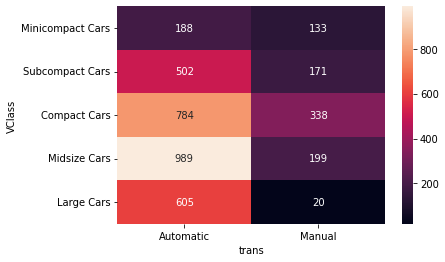

In [17]:
sb.heatmap(data=counts, annot=True, fmt='d');

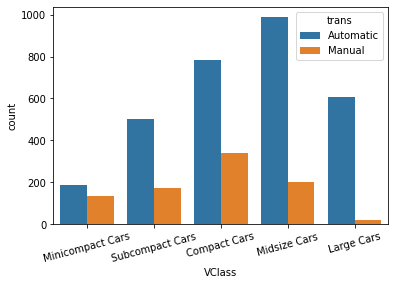

In [18]:
sb.countplot(data=df, x='VClass', hue='trans')
plt.xticks(rotation=15);